<a href="https://colab.research.google.com/github/yashvi-132/Covid-analysis/blob/main/covidanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet

In [ ]:
import fbprophet
from fbprophet import Prophet

In [ ]:
import pandas as pd
df= pd.read_csv('/content/covid_19_clean_complete.csv')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
pd.to_datetime(df['Date'])

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
49063   2020-07-27
49064   2020-07-27
49065   2020-07-27
49066   2020-07-27
49067   2020-07-27
Name: Date, Length: 49068, dtype: datetime64[ns]

In [ ]:
df.isnull().sum()  #to check if there are null values

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
total= df.groupby(df['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()  #dataframe which we will use to predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [ ]:
# in prophet the columns need to be renamed to df and y where df: date n y: predictive column

In [ ]:
df_prophet= total.rename(columns={'Date': 'ds', 'Confirmed': 'y'})

In [ ]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [ ]:
m= Prophet() #intialize our library

In [ ]:
model= m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [ ]:
future_global= model.make_future_dataframe(periods=30, freq='D') #will create future dates (30days) and add it to df_prophet

In [ ]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [ ]:
predict= model.predict(future_global)
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.323896e+03,-1.234616e+05,7.686047e+04,-9.323896e+03,-9.323896e+03,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,0.0,0.0,0.0,-2.030360e+04
1,2020-01-23,-6.626094e+03,-1.116661e+05,9.251828e+04,-6.626094e+03,-6.626094e+03,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,0.0,0.0,0.0,-7.727307e+03
2,2020-01-24,-3.928293e+03,-1.019006e+05,1.045931e+05,-3.928293e+03,-3.928293e+03,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,0.0,0.0,0.0,6.127475e+03
3,2020-01-25,-1.230492e+03,-9.108313e+04,1.151353e+05,-1.230492e+03,-1.230492e+03,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,1.249814e+04
4,2020-01-26,1.467309e+03,-1.005608e+05,1.087625e+05,1.467309e+03,1.467309e+03,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,8.746118e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144165e+07,2.107517e+07,2.187342e+07,2.106844e+07,2.181572e+07,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,2.145538e+07
214,2020-08-23,2.164576e+07,2.123334e+07,2.205007e+07,2.124672e+07,2.204008e+07,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,2.165304e+07
215,2020-08-24,2.184988e+07,2.141762e+07,2.227033e+07,2.143315e+07,2.226418e+07,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,0.0,0.0,0.0,2.184773e+07
216,2020-08-25,2.205399e+07,2.158494e+07,2.248741e+07,2.161572e+07,2.248876e+07,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,0.0,0.0,0.0,2.203715e+07


In [ ]:
predict[['ds',	'yhat',	'yhat_lower',	'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145538e+07,2.107517e+07,2.187342e+07
214,2020-08-23,2.165304e+07,2.123334e+07,2.205007e+07
215,2020-08-24,2.184773e+07,2.141762e+07,2.227033e+07
216,2020-08-25,2.203715e+07,2.158494e+07,2.248741e+07
217,2020-08-26,2.224712e+07,2.179062e+07,2.272815e+07


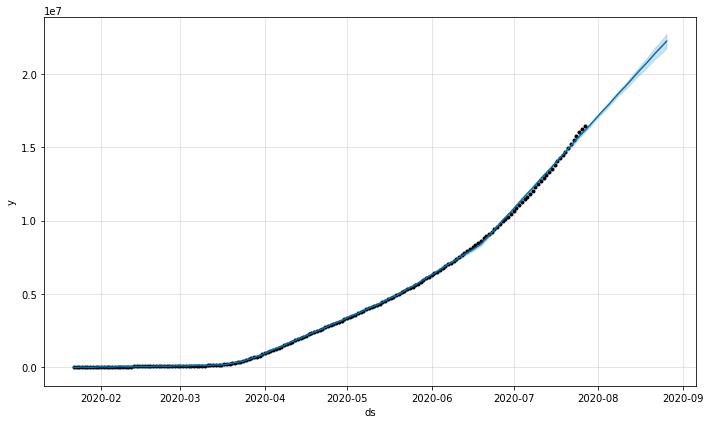

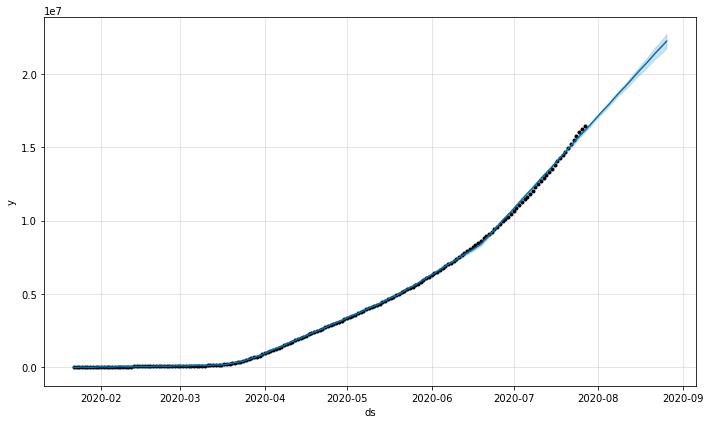

In [ ]:
model.plot(predict)

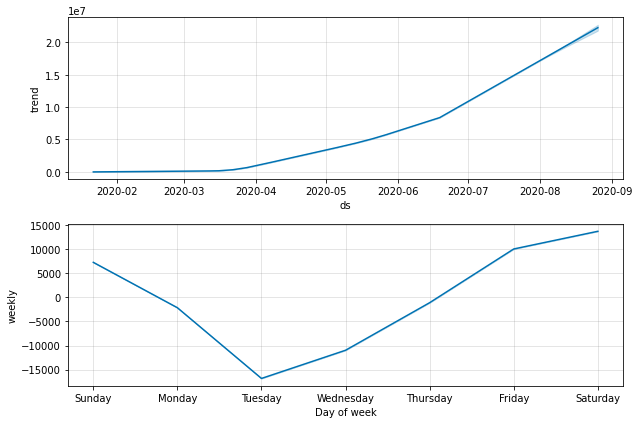

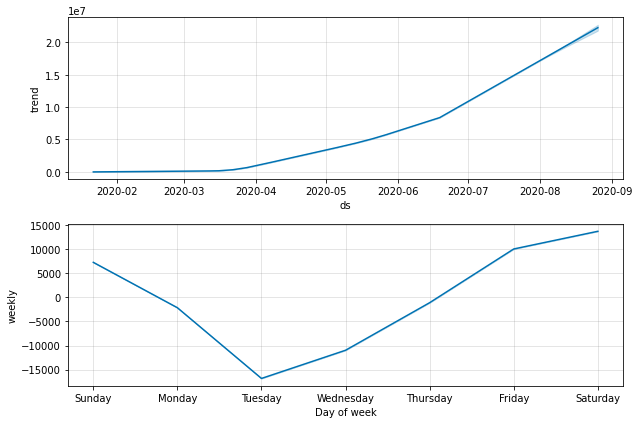

In [ ]:
model.plot_components(predict)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

[[<matplotlib.lines.Line2D at 0x7f8874279290>],

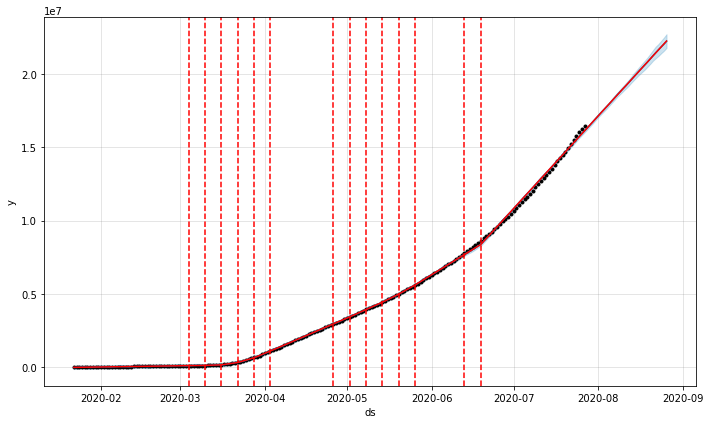

In [ ]:
fig=model.plot(predict)
add_changepoints_to_plot(fig.gca(), model, predict)

In [ ]:
from fbprophet.diagnostics import cross_validation 

In [ ]:
cv= cross_validation(model, horizon='30 Days', period='15 Days', initial='90 Days',) 
#horizon: number of day to cross validate #period: is half of horizon

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [ ]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.196182e+06,3.206422e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279750e+06,3.291331e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361328e+06,3.376697e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439229e+06,3.461347e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.514042e+06,3.545000e+06,3515244,2020-04-28


In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_performance= performance_metrics(cv)
df_performance.head()  #rmse with value between 15 25 is condider good rmse plot beloe

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.721596e+10,164972.604876,129190.213315,0.016867,0.017675,0.000000
1,4 days,3.770271e+10,194171.855844,151379.846239,0.019330,0.022485,0.000000
2,5 days,5.170151e+10,227379.657369,175214.816680,0.021780,0.025717,0.066667
3,6 days,6.937441e+10,263390.225361,202192.647173,0.024558,0.026714,0.133333
4,7 days,9.012810e+10,300213.430311,232530.254272,0.027838,0.031274,0.200000


In [ ]:
from fbprophet.plot import plot_cross_validation_metric 

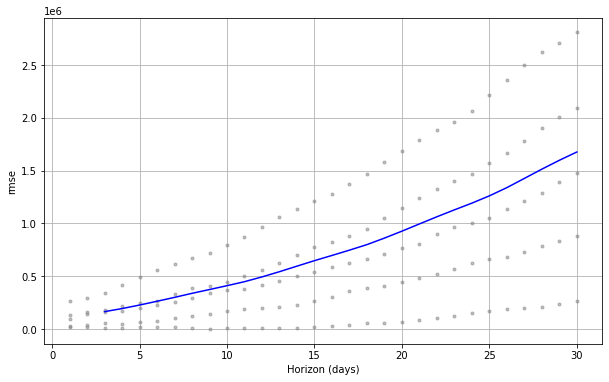

In [ ]:
df_performance= plot_cross_validation_metric(cv, metric='rmse')

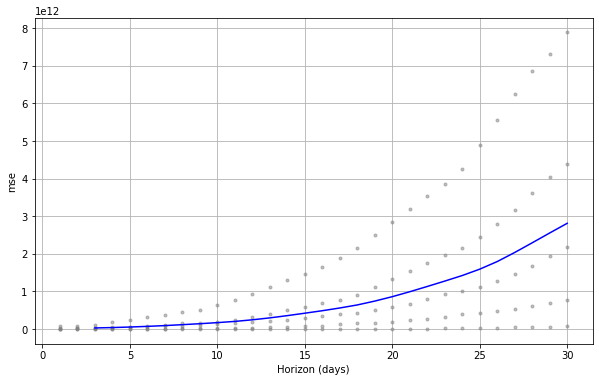

In [ ]:
df_performance= plot_cross_validation_metric(cv, metric='mse')